In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
!pip install catboost

In [3]:
from catboost import CatBoostClassifier

In [24]:
df = pd.read_csv(r'C:\Users\ozkon\Documents\train_dataset_train.zip',low_memory=False)
df2 = pd.read_csv(r'C:\Users\ozkon\Documents\underground_train.zip',low_memory = False)

In [5]:
df.head()

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964,Цех,7503.0,N,0.0,Y,N,416.0,...,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819,Участок,7503.0,N,0.0,Y,N,795.0,...,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0


In [6]:
df = df.fillna(0)

In [6]:
X = df.select_dtypes(include=[object])
X.head()

,oper_type + oper_attr,index_oper,type,is_privatecategory,is_in_yandex,is_return,name_mfi
0,1043_-1,628629,Участок,N,Y,N,"Fishhook,USB"
1,1023_-1,102976,ММПО,N,N,N,"screen protector,Case(Q613B),case(208B40-DB)"
2,1018_-1,620962,Цех,N,Y,N,"Pendant Necklaces,Rings for Women,Necklaces"
3,1019_-1,344964,Цех,N,Y,N,Motorcycle Signal Lamp
4,1020_-1,629819,Участок,N,Y,N,backpack


In [7]:
X = X.drop('index_oper', axis = 1)

In [8]:
X.head()

,oper_type + oper_attr,type,is_privatecategory,is_in_yandex,is_return,name_mfi
0,1043_-1,Участок,N,Y,N,"Fishhook,USB"
1,1023_-1,ММПО,N,N,N,"screen protector,Case(Q613B),case(208B40-DB)"
2,1018_-1,Цех,N,Y,N,"Pendant Necklaces,Rings for Women,Necklaces"
3,1019_-1,Цех,N,Y,N,Motorcycle Signal Lamp
4,1020_-1,Участок,N,Y,N,backpack


In [8]:
X.head()

,type,is_privatecategory,is_in_yandex,is_return
0,Участок,N,Y,N
1,ММПО,N,N,N
2,Цех,N,Y,N
3,Цех,N,Y,N
4,Участок,N,Y,N


In [9]:
df = df.drop(['id','name_mfi','oper_type + oper_attr'], axis = 1)


In [10]:
df = df.drop('mailrank', axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 25 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   index_oper                     object 
 1   type                           object 
 2   priority                       float64
 3   is_privatecategory             object 
 4   class                          float64
 5   is_in_yandex                   object 
 6   is_return                      object 
 7   weight                         float64
 8   mailtype                       float64
 9   mailctg                        float64
 10  directctg                      float64
 11  transport_pay                  float64
 12  postmark                       float64
 13  weight_mfi                     float64
 14  price_mfi                      float64
 15  dist_qty_oper_login_1          float64
 16  total_qty_oper_login_1         float64
 17  total_qty_oper_login_0         float64
 18  to

In [26]:
#X1 = X[['index_oper']]
#X2 = X[['type']]
#X3 = X[['is_privatecategory']]
#X4 = X[['is_in_yandex']]
#X5 = X[['is_return']]

In [95]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7, min_samples_split = 10, min_samples_leaf =8)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=10)

In [11]:
x = df.drop('label',axis = 1)

In [12]:
y = df[['label']]

In [13]:
dftest = pd.read_csv(r'C:\Users\ozkon\Documents\test_dataset_test.csv',low_memory = False)

In [27]:
dftest.shape

NameError: name 'dftest' is not defined

In [14]:
df.head()

,priority,class,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,weight_mfi,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,7503.0,0.0,87.0,5.0,1.0,0.0,2.0,0.00,0.0,41.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,7503.0,0.0,107.0,5.0,1.0,0.0,2.0,0.00,0.0,68.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,7503.0,0.0,50.0,5.0,1.0,0.0,2.0,0.00,0.0,56.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,7503.0,0.0,416.0,5.0,1.0,0.0,2.0,35.34,0.0,33.0,...,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,7503.0,0.0,795.0,5.0,1.0,0.0,2.0,52.52,0.0,716.0,...,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0


In [10]:
X = df.select_dtypes(include=[object])
X.head()

,index_oper,type,is_privatecategory,is_in_yandex,is_return
0,628629,Участок,N,Y,N
1,102976,ММПО,N,N,N
2,620962,Цех,N,Y,N
3,344964,Цех,N,Y,N
4,629819,Участок,N,Y,N


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [89]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=10)

In [90]:
predict = dt.predict(x_test)

In [54]:
dt.score(x_train,y_train)

0.972185625

In [55]:
dt.score(x_test,y_test)

0.9720775

In [91]:
precision_score(predict,y_test)

0.051034080978735796

In [92]:
recall_score(predict,y_test)

0.6534875046624394

<AxesSubplot:>

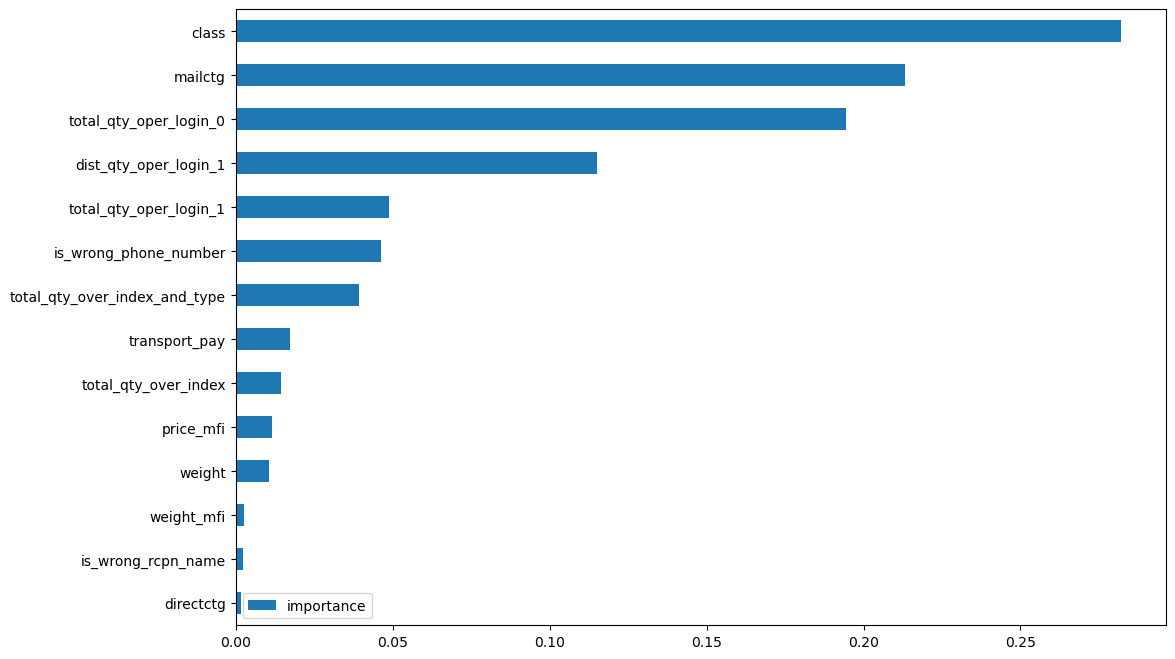

In [58]:
imp = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [38]:
df = df.drop(['mailtype','is_wrong_sndr_name','priority','postmark','is_wrong_address','mailrank'],axis = 1)

In [ ]:
dataframe4 = df.drop(['directctg','is_wrong_rcpn_name',''])

In [29]:
parameters = {'criterion':['gini','entropy'], 'max_depth' : range (1,10)}

In [30]:
grid_search_cv_clf = GridSearchCV(estimator = dt, param_grid = parameters, cv = 5)

In [31]:
grid_search_cv_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 7)})

In [32]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [34]:
bestclf = grid_search_cv_clf.best_estimator_

In [38]:
y_pred = pd.DataFrame(bestclf.predict(x_test))

In [39]:
y_pred.value_counts()

0    1198388
1       1612
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

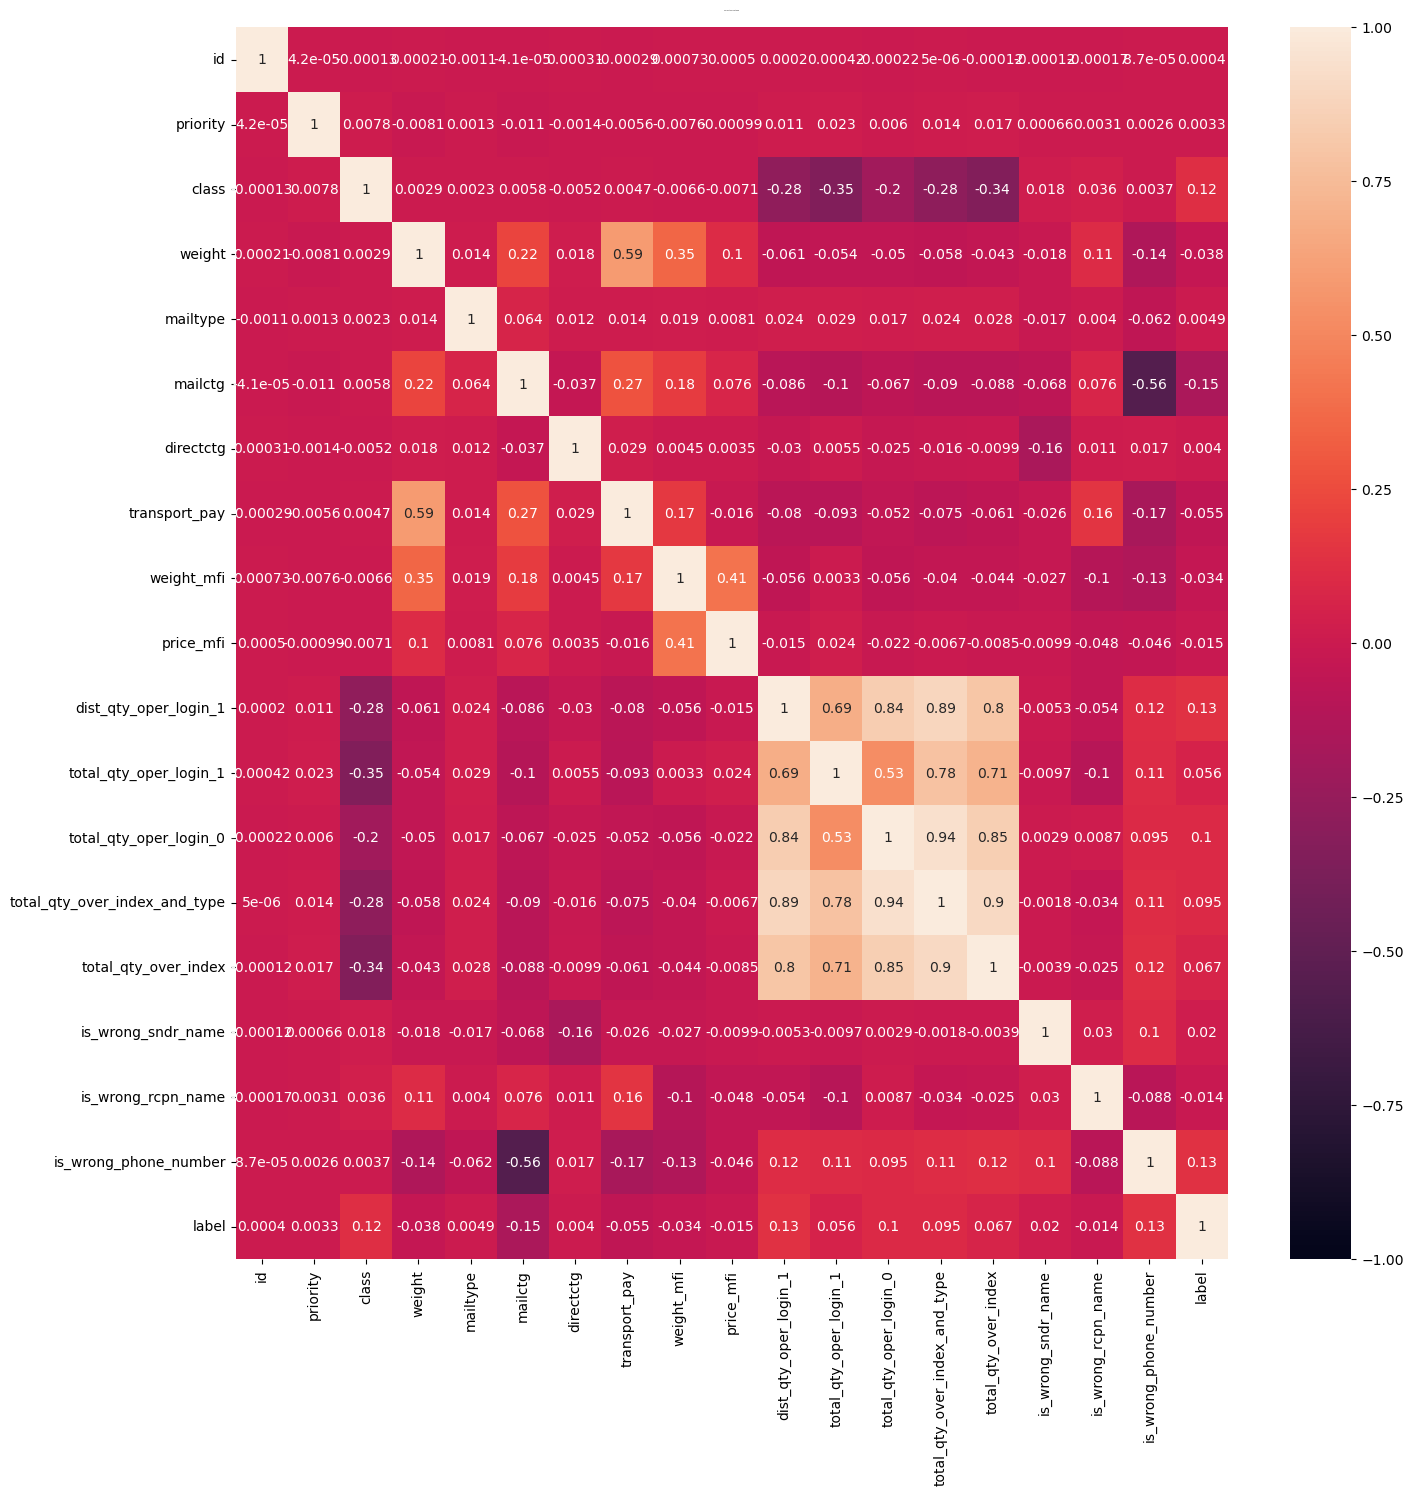

In [83]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':1}, pad=12)

In [96]:
rf = RandomForestClassifier()

In [97]:
parametrs = {'n_estimators':[10,20,30,40],'max_depth':[10,20,30,40,50],'min_samples_leaf':[5,6,7,8],'min_samples_split':[10,15,18,20]}

In [98]:
grid_search_cv_clf_rf = GridSearchCV(rf, parametrs, cv = 5)

In [99]:
grid_search_cv_clf_rf.fit(x_train,y_train)

C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

KeyboardInterrupt: 

In [100]:
rf.fit(x_train,y_train)

C:\Users\ozkon\AppData\Local\Temp\ipykernel_31816\1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


KeyboardInterrupt: 

In [127]:
gb = HistGradientBoostingClassifier(max_depth = 10)

In [128]:
clfgb = gb.fit(x_train, y_train)

C:\Users\ozkon\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
clfgbpredicts = clfgb.predict(x_test)

In [130]:
precision_score(clfgbpredicts,y_test) 

0.043955723856685114

In [131]:
recall_score(clfgbpredicts,y_test) 

0.6812641083521445

In [132]:
roc_auc_score(clfgbpredicts,y_test)

0.8269313482897904

In [133]:
resulttruegb = 0.1*recall_score(clfgbpredicts,y_test) +0.9*roc_auc_score(clfgbpredicts,y_test)
resulttruegb

0.8123646242960259

In [110]:
resulttrue = 0.1*recall_score(predict,y_test)+0.9*roc_auc_score(predict,y_test)

In [111]:
resulttrue

0.7971740221922563

In [70]:
y_predicted_prob = dt.predict_proba(x_test)

In [48]:
y_predicted_prob

array([[1.        , 0.        ],
       [0.99464598, 0.00535402],
       [0.9251478 , 0.0748522 ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.98949081, 0.01050919]])

<AxesSubplot:>

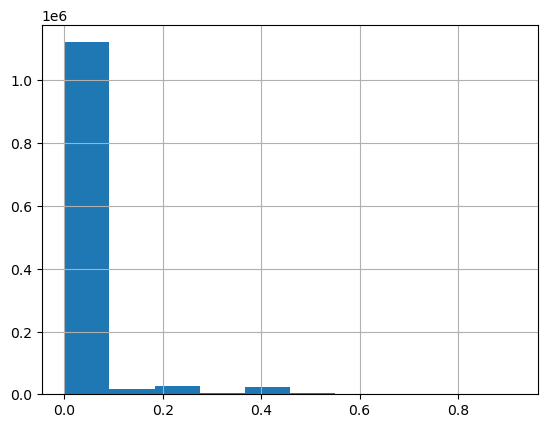

In [71]:
pd.Series(y_predicted_prob[:,1]).hist()

In [72]:
fpr, tpr, tresholds = roc_curve (y_test,y_predicted_prob[:,1])

In [73]:
roc_auc = auc(fpr, tpr)

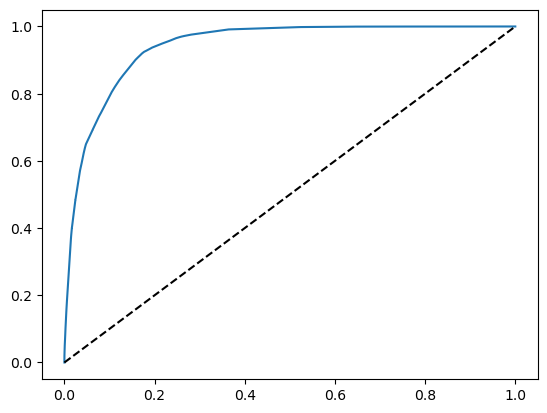

In [74]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 15 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   class                          float64
 1   weight                         float64
 2   mailctg                        float64
 3   directctg                      float64
 4   transport_pay                  float64
 5   weight_mfi                     float64
 6   price_mfi                      float64
 7   dist_qty_oper_login_1          float64
 8   total_qty_oper_login_1         float64
 9   total_qty_oper_login_0         float64
 10  total_qty_over_index_and_type  float64
 11  total_qty_over_index           float64
 12  is_wrong_rcpn_name             int64  
 13  is_wrong_phone_number          int64  
 14  label                          int64  
dtypes: float64(12), int64(3)
memory usage: 686.6 MB


In [15]:
x_train.head()

,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,...,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address
3604976,243149,П,7503.0,N,2.0,Y,N,141.0,5.0,1.0,...,190.0,7.0,72206.0,7646.0,79852.0,1110354.0,0,0,1,0
5936295,683962,Участок,7503.0,N,0.0,Y,N,736.0,5.0,1.0,...,300.0,15.0,487093.0,147547.0,634640.0,4821535.0,0,0,0,0
1804115,102976,ММПО,7503.0,N,0.0,N,N,175.0,5.0,0.0,...,100.0,972.0,68766046.0,91123247.0,159889293.0,164927295.0,0,0,1,0
4351206,620984,Участок,7503.0,N,0.0,N,N,753.0,5.0,1.0,...,7.0,27.0,9164121.0,4770841.0,13934962.0,14030822.0,0,0,1,0
5014389,102971,Цех,7506.0,N,0.0,N,N,1138.0,5.0,1.0,...,380.0,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0


In [16]:
features = list(x_train.columns)

In [17]:
cat_features = ['index_oper','type','is_privatecategory','is_in_yandex','is_return']

In [1]:
model_cb = CatBoostClassifier(task_type = 'GPU',iterations = 10,random_state = 42,eval_metric = 'F1', leaf_estimation_method='Gradient',max_ctr_complexity=1, logging_level='Debug')

NameError: name 'CatBoostClassifier' is not defined

In [2]:
model_cb.fit(X_train,Y_train, cat_features = cat_features, plot = True, eval_set = (X_test,Y_test))

NameError: name 'model_cb' is not defined

In [20]:
y_predcb = model_cb.predict(x_test)

In [22]:
precision_score(y_predcb,y_test)

0.021759394115933587

In [21]:
recall_score(y_predcb,y_test)

0.6657754010695187

In [22]:
roc_auc_score(y_predcb,y_test)

0.8188816882466032

In [23]:
resulttrue = 0.1*recall_score(y_predcb,y_test)+0.9*roc_auc_score(y_predcb,y_test)
resulttrue

0.8035710595288947

In [49]:
df2.shape

(1091021, 12)

In [50]:
X = df2.drop(['label','ticket_id'],axis = 1)

In [52]:
Y = df2[['label','time_to_under']]

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y[['label']], test_size=0.2, random_state = 42)

In [54]:
cat_features = ['pass_dttm','entrance_nm','ticket_type_nm','station_nm','line_nm']

In [58]:
df2.label.nunique()

276